In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [3]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['image_id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████| 1821/1821 [02:29<00:00, 20.18it/s]


In [4]:
X.shape

(1821, 400, 400, 3)

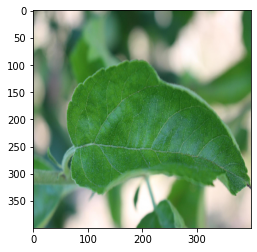

In [5]:
plt.imshow(X[2])

In [6]:
train['multiple_diseases'][2]

0

In [7]:
y = np.array(train.drop(['image_id'],axis=1))
y.shape

(1821, 4)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.1)

In [9]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test), batch_size=64)

Train on 1638 samples, validate on 183 samples
Epoch 1/6
1638/1638 [==============================] - ETA: 33:15 - loss: 0.6896 - accuracy: 0.543 - ETA: 18:47 - loss: 0.7591 - accuracy: 0.619 - ETA: 13:55 - loss: 0.7234 - accuracy: 0.614 - ETA: 11:11 - loss: 0.7080 - accuracy: 0.611 - ETA: 9:27 - loss: 0.6975 - accuracy: 0.620 - ETA: 8:21 - loss: 0.6832 - accuracy: 0.64 - ETA: 7:22 - loss: 0.6650 - accuracy: 0.65 - ETA: 6:36 - loss: 0.6644 - accuracy: 0.65 - ETA: 5:56 - loss: 0.6585 - accuracy: 0.66 - ETA: 5:23 - loss: 0.6488 - accuracy: 0.67 - ETA: 4:53 - loss: 0.6420 - accuracy: 0.67 - ETA: 4:25 - loss: 0.6377 - accuracy: 0.67 - ETA: 4:02 - loss: 0.6339 - accuracy: 0.67 - ETA: 3:39 - loss: 0.6290 - accuracy: 0.68 - ETA: 3:17 - loss: 0.6257 - accuracy: 0.68 - ETA: 2:59 - loss: 0.6258 - accuracy: 0.68 - ETA: 2:38 - loss: 0.6247 - accuracy: 0.68 - ETA: 2:18 - loss: 0.6231 - accuracy: 0.68 - ETA: 1:58 - loss: 0.6206 - accuracy: 0.68 - ETA: 1:38 - loss: 0.6186 - accuracy: 0.68 - ETA: 1:20

In [76]:
test = pd.read_csv('test.csv')
test.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.325468,0.135776,0.418258,0.396914
1,Test_1,0.326293,0.130487,0.415456,0.389901
2,Test_2,0.330369,0.136900,0.416173,0.393553
3,Test_3,0.356903,0.133454,0.405138,0.373612
4,Test_4,0.326220,0.135698,0.418492,0.395385


In [14]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['image_id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

100%|██████████████████████████████████████████████████████████████████████████████| 1821/1821 [03:32<00:00,  8.55it/s]


In [27]:
classes = np.array(train.columns[1:])
proba = model.predict(test_image[0].reshape(1,400,400,3))

In [28]:
proba

array([[0.32546753, 0.13577561, 0.41825777, 0.39691412]], dtype=float32)

In [36]:
data = []
for i in tqdm(range(test.shape[0])):
    proba = model.predict(test_image[i].reshape(1,400,400,3))
    data.append((proba))

100%|██████████████████████████████████████████████████████████████████████████████| 1821/1821 [02:55<00:00, 10.36it/s]


In [58]:
df_result = pd.DataFrame(np.array(data).reshape(1821,4), columns = ['healthy', 'multiple_disease', 'rust', 'scab'])

In [59]:
df_result.shape

(1821, 4)

In [60]:
df_result.head()

,healthy,multiple_disease,rust,scab
0,0.325468,0.135776,0.418258,0.396914
1,0.326293,0.130487,0.415456,0.389901
2,0.330369,0.136900,0.416173,0.393553
3,0.356903,0.133454,0.405138,0.373612
4,0.326220,0.135698,0.418492,0.395385


In [70]:
df = pd.read_csv('C:/Users/Dell/Desktop/Plant Pathology/test.csv')
df.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [71]:
df['healthy'] = df_result['healthy']
df.head()

,image_id,healthy
0,Test_0,0.325468
1,Test_1,0.326293
2,Test_2,0.330369
3,Test_3,0.356903
4,Test_4,0.326220


In [72]:
df['multiple_diseases'] = df_result['multiple_disease']
df.head()

,image_id,healthy,multiple_diseases
0,Test_0,0.325468,0.135776
1,Test_1,0.326293,0.130487
2,Test_2,0.330369,0.136900
3,Test_3,0.356903,0.133454
4,Test_4,0.326220,0.135698


In [73]:
df['rust'] = df_result['rust']
df.head()

,image_id,healthy,multiple_diseases,rust
0,Test_0,0.325468,0.135776,0.418258
1,Test_1,0.326293,0.130487,0.415456
2,Test_2,0.330369,0.136900,0.416173
3,Test_3,0.356903,0.133454,0.405138
4,Test_4,0.326220,0.135698,0.418492


In [74]:
df['scab'] = df_result['scab']
df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.325468,0.135776,0.418258,0.396914
1,Test_1,0.326293,0.130487,0.415456,0.389901
2,Test_2,0.330369,0.136900,0.416173,0.393553
3,Test_3,0.356903,0.133454,0.405138,0.373612
4,Test_4,0.326220,0.135698,0.418492,0.395385


In [75]:
df.to_csv (r'test.csv', index = False, header=True)